# Proportional Integral (PI) Control

A variation of Proportional Integral Derivative (PID) control is to use only the proportional and integral terms as PI control. The PI controller is the most popular variation, even more than full PID controllers. The value of the controller output $u(t)$ is fed into the system as the manipulated variable input.

$$e(t) = SP-PV$$

$$u(t) = u_{bias} + K_c \, e(t) + \frac{K_c}{\tau_I}\int_0^t e(t)dt$$

The $u_{bias}$ term is a constant that is typically set to the value of $u(t)$ when the controller is first switched from manual to automatic mode. This gives "bumpless" transfer if the error is zero when the controller is turned on. The two tuning values for a PI controller are the controller gain, $K_{c}$ and the integral time constant $\tau_{I}$. The value of $K_{c}$ is a multiplier on the proportional error and integral term and a higher value makes the controller more aggressive at responding to errors away from the set point. The set point (SP) is the target value and process variable (PV) is the measured value that may deviate from the desired value. The error from the set point is the difference between the SP and PV and is defined as $e(t) = SP - PV$.

### Discrete PI Controller

Digital controllers are implemented with discrete sampling periods and a discrete form of the PI equation is needed to approximate the integral of the error. This modification replaces the continuous form of the integral with a summation of the error and uses $\Delta t$ as the time between sampling instances and $n_{t}$ as the number of sampling instances.

$$u(t) = u_{bias} + K_c \, e(t) + \frac{K_c}{\tau_I}\sum_{i=1}^{n_t} e_i(t)\Delta t$$

### Overview of PI Control

PI control is needed for non-integrating processes, meaning any process that eventually returns to the same output given the same set of inputs and disturbances. A P-only controller is best suited to integrating processes. Integral action is used to remove offset and can be thought of as an adjustable $u_{bias}$. Common tuning correlations for PI control are the ITAE (Integral of Time-weighted Absolute Error) method and IMC (Internal Model Control). IMC is an extension of lambda tuning by accounting for time delay. The parameters $K_{c}, \tau_{p}$, and $\theta_{p}$ are obtained by fitting dynamic input and output data to a first-order plus dead-time (FOPDT) model.

### IMC Tuning Correlations

$$\mathrm{Aggressive\,Tuning:} \quad \tau_c = \max \left( 0.1 \tau_p, 0.8 \theta_p \right)$$
$$\mathrm{Moderate\,Tuning:} \quad \tau_c = \max \left( 1.0 \tau_p, 8.0 \theta_p \right)$$
$$\mathrm{Conservative\,Tuning:} \quad \tau_c = \max \left( 10.0 \tau_p, 80.0 \theta_p \right)$$
$$K_c = \frac{1}{K_p}\frac{\tau_p}{\left( \theta_p + \tau_c \right)} \quad \quad \tau_I = \tau_p$$

Note that with moderate tuning and negligible dead-time $(\theta_p$ to 0 and  $\tau_c = 1.0 \tau_p)$, IMC reduces to simple tuning correlations that are easy to recall without a reference book.

$$K_c = \frac{1}{K_p} \quad \quad \tau_I = \tau_p \quad \quad \mathrm{Simple\,tuning\,correlations}$$

### ITAE Tuning Correlations

Different tuning correlations are provided for disturbance rejection (also referred to as regulatory control) and set point tracking (also referred to as servo control).

$$K_c = \frac{0.586}{K_p}\left(\frac{\theta_p}{\tau_p}\right)^{-0.916} \quad \tau_I = \frac{\tau_p}{1.03-0.165\left(\theta_p/\tau_p\right)}\quad\mathrm{Set\;point\;tracking}$$
$$K_c = \frac{0.859}{K_p}\left(\frac{\theta_p}{\tau_p}\right)^{-0.977} \quad \tau_I = \frac{\tau_p}{0.674}\left(\frac{\theta_p}{\tau_p}\right)^{0.680}\quad\mathrm{Disturbance\;rejection}$$

### Anti-Reset Windup

An important feature of a controller with an integral term is to consider the case where the controller output $u(t)$ saturates at an upper or lower bound for an extended period of time. This causes the integral term to accumulate to a large summation that causes the controller to stay at the saturation limit until the integral summation is reduced. Anti-reset windup is that the integral term does not accumulate if the controller output is saturated at an upper or lower limit.

Suppose that a driver of a vehicle set the desired speed set point to a value higher than the maximum speed. The automatic controller would saturate at full throttle and stay there until the driver lowered the set point. Suppose that the driver kept the speed set point higher than the maximum velocity of the vehicle for an hour. The discrepancy between the set point and the current speed would create a large integral term. If the driver then set the speed set point to zero, the controller would wait to lower the throttle until the negative error cancels out the positive error from the hour of driving. The automobile would not slow down but continue at full throttle for an extended period of time. This undesirable behavior is fixed by implementing anti-reset windup.

### Exercise

The purpose of this exercise is to investigate the cause of offset in a P-only controller and oscillations in a PI controller.

**Open Loop Response**

Consider a first order plus dead time process as

$$\tau_p \frac{dy}{dt} = -y + K_p u \left(t-\theta_p\right)$$

with $K_{p}=2, \tau_{p}=200$, and $\theta_{p}=0$. Simulate the behavior for making a step change in manual mode from 0 to 10 (and back). Explain what happens in terms of oscillations or a smooth response.

**P-only Control**

Simulate the behavior for using a P-only controller with $K_{c}=2$ and $K_{c}=0.5$. Implement a set point change from 0 to 10 and back in automatic mode (closed-loop). Include a plot of the error between the set point (SP) and process variable (PV). What happens with increased $K_{c}$ in terms of offset and oscillation?

**PI Control**

Configure the controller to add an integral term in addition to the proportional control with $K_{c}=2$. Simulate the PI controller response with integral reset times $\tau_{I}=200,100,10$. Include a plot of the integral of the error between the set point (SP) and process variable (PV) with anti-reset windup. Explain what happens and why.

**Open Loop Response with Dead Time**

Add dead time $\theta_{p}=100$ as an input delay. Simulate the behavior for making a step change in manual mode from 0 to 10 (and back). Explain what happens in terms of oscillations.

**P-only Control with Dead Time**

With the dead time, simulate the response of a P-only controller with $K_{c}=2$ and $K_{c}=0.5$. Implement a set point change from 0 to 10 and back in automatic mode (closed-loop). Include a plot of the error between the set point (SP) and process variable (PV). What happens with increased $K_{c}$ in terms of offset and oscillation?

**PI Control with Dead Time**

Simulate the response of a PI controller with $\tau_{I}=200$. Include a plot of the integral of the error between the set point (SP) and process variable (PV) with anti-reset windup. Explain what happens and why. Explain the results.

**Summary Questions**

1. Based on the observations in manual mode, is the process stable or unstable?
2. Why does P-only control have persistent offset?
3. What is the effect of dead time on P-only and PI control?
4. If the process is stable, why can the control system make it unstable?

No handles with labels found to put in legend.


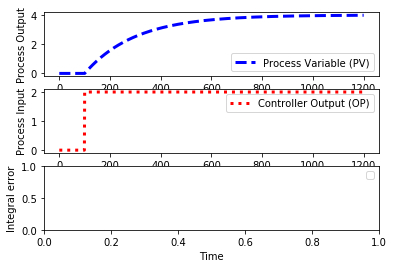

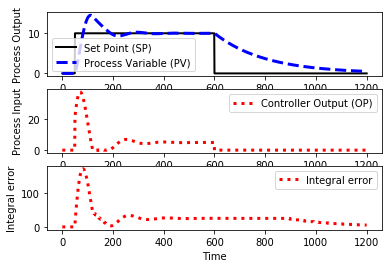

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Specify number of steps
ns = 1200

# Define time points
t = np.linspace(0,ns,ns+1)

# Mode (manual=0, automatic=1)
mode = 1

class model(object):
    # process model
    Kp = 2.0
    taup = 200.0
    thetap = 0.0

class pid(object):
    # PID tuning
    Kc = 2.0
    tauI = 10.0
    tauD = 0
    sp = []

# Define Set Point
sp = np.zeros(ns+1)  # set point
sp[50:600] = 10
sp[600:] = 0
pid.sp = sp

def process(y,t,u,Kp,taup):
    # Kp = process gain
    # taup = process time constant
    dydt = -y/taup + Kp/taup * u
    return dydt

def calc_response(t,mode,xm,xc):
    # t = time points
    # mode (manual=0, automatic=1)
    # process model
    Kp = xm.Kp
    taup = xm.taup
    thetap = xm.thetap

    # specify number of steps
    ns = len(t)-1

    # PID tuning
    Kc = xc.Kc
    tauI = xc.tauI
    tauD = xc.tauD
    sp = xc.sp

    # Time step
    delta_t = t[1]-t[0]

    # Storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros(ns+1)  # process variable
    e = np.zeros(ns+1)   # error
    ie = np.zeros(ns+1)  # integral of the error
    dpv = np.zeros(ns+1) # derivative of the pv
    P = np.zeros(ns+1)   # proportional
    I = np.zeros(ns+1)   # integral
    D = np.zeros(ns+1)   # derivative

    # Step input for manual control
    if mode==0:
        op[100:]=2

    # Upper and Lower limits on OP
    op_hi = 100.0
    op_lo = 0.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t))

    # Loop through time steps    
    for i in range(0,ns):

        # Error
        e[i] = sp[i] - pv[i]

        # Calculate derivative and integral terms
        if i >= 1:  
            dpv[i] = (pv[i]-pv[i-1])/delta_t
            ie[i] = ie[i-1] + e[i] * delta_t

        # PID control
        P[i] = Kc * e[i]
        I[i] = Kc/tauI * ie[i]
        D[i] = - Kc * tauD * dpv[i]

        # Mode
        if mode==1:
            op[i] = op[0] + P[i] + I[i] + D[i]

        # Check limits
        if op[i] > op_hi:  # check upper limit
            op[i] = op_hi
            ie[i] = ie[i] - e[i] * delta_t # anti-reset windup
        if op[i] < op_lo:  # check lower limit
            op[i] = op_lo
            ie[i] = ie[i] - e[i] * delta_t # anti-reset windup

        # Implement time delay
        iop = max(0,i-ndelay)
        y = odeint(process,pv[i],[0,delta_t],args=(op[iop],Kp,taup))

        # Set new state
        pv[i+1] = y[-1]

    # End points
    op[ns] = op[ns-1]
    ie[ns] = ie[ns-1]
    P[ns] = P[ns-1]
    I[ns] = I[ns-1]
    D[ns] = D[ns-1]

    return (pv,op, ie)

def plot_response(n,mode,t,pv,op,sp,ie):

    # plot results
    plt.figure(n)
    plt.subplot(3,1,1)
    if (mode==1): plt.plot(t,sp,'k-',linewidth=2,label='Set Point (SP)')
    plt.plot(t,pv,'b--',linewidth=3,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.ylabel('Process Output')
    plt.subplot(3,1,2)
    plt.plot(t,op,'r:',linewidth=3,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.ylabel('Process Input')
    plt.xlabel('Time')
    plt.subplot(3,1,3)
    if mode==1: plt.plot(t,ie,'r:',linewidth=3,label='Integral error')
    plt.legend(loc='best')
    plt.ylabel('Integral error')
    plt.xlabel('Time')

# Set process params
model.Kp = 2.0
model.taup = 200.0
model.thetap = 0.0
mode = 0

# Calculate manual response
(pv,op, ie) = calc_response(t,mode,model,pid)

# Plot manual response
plot_response(1,mode,t,pv,op,sp,ie)

# Set control params
pid.Kc = 2.0
pid.tauI = 10.0
pid.tauD = 0.0
mode = 1

# Calculate control response
(pv,op, ie) = calc_response(t,mode,model,pid)

# Plot control response
plot_response(2,mode,t,pv,op,sp,ie)

# Show
plt.show()